# Permutation testing - more practice

The aim of these exercises is to give you some practice running permutation tests and deciding what to permute and what your test statistic is in each case!

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Import and view the data

We will work with a fictional dataset containing wellbeing scores pre- and post the vacation for 300 Oxford students. 

For each student was also have the following information:
* subject studied
* college

In [2]:
wb = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/WellbeingSample.csv')
wb

,ID_code,College,Subject,Score_preVac,Score_postVac
0,247610,Lonsdale,PPE,60,35
1,448590,Lonsdale,PPE,43,44
2,491100,Lonsdale,engineering,79,69
3,316150,Lonsdale,PPE,55,61
4,251870,Lonsdale,engineering,62,65
...,...,...,...,...,...
296,440570,Beaufort,history,75,70
297,826030,Beaufort,maths,52,49
298,856260,Beaufort,Biology,83,84
299,947060,Beaufort,engineering,62,65



### 1. For engineering students, is wellbeing increased after the vacation compared to before?


We hypothesise that engineering students will feel better after the vacation. Test the hypothesis using a permutation test.

First let's remind ourselves how to get just the rows of the dataframe containing engineering students:

In [3]:
wb.query('Subject == "engineering"')

,ID_code,College,Subject,Score_preVac,Score_postVac
2,491100,Lonsdale,engineering,79,69
4,251870,Lonsdale,engineering,62,65
6,841260,Lonsdale,engineering,71,58
7,960120,Lonsdale,engineering,54,54
15,670880,Lonsdale,engineering,70,69
...,...,...,...,...,...
266,842870,Beaufort,engineering,52,58
278,414020,Beaufort,engineering,76,82
291,384240,Beaufort,engineering,78,89
294,457900,Beaufort,engineering,72,62


#### Things you need to decide:

* what is our null hypothesis
* what is our alternative hypothesis?

Is it a paired or unpaired test?
* therefore which `permutation_type` is needed, `samples`, `pairings` or `independent`?
* are we testing for the mean difference (within pairs) `mean(x-y)`, or the difference of means `mean(x)-mean(y)`
* what actually are `x` and `y` in this case?
        
Is it a one- or two-tailed test?
* therefore which `alternative` hypothesis type is needed, `two-sided`, `greater` or `less`?

What $\alpha$ value will you use?
* what value must $p$ be smaller than, to reject the null hypothesis?
* this is the experimenter's choice but usually 0.05 is used (sometimes 0.001 or 0.001)

#### The answers to the things you need to decide!

$\mathcal{H_0}$: The mean difference in wellbeing post-pre vacation is zero for engineering students

$\mathcal{H_a}$: The mean difference in wellbeing post-pre vacation is greater than zero for engineering students, ie wellbeing improves over the vacation.

This is a paired test as we are comparing each person's wellbeing before the vacation to their own wellbeing after the vacation. Therefore we are testing the mean difference `mean(x-y)` and need to shuffle the `samples` (flip pre and post labels with pairs, but don't break the pairings)

In [4]:
# define a funtion that gives the mean difference for two series x and y
def mDiff(x,y):
    return np.mean(x-y)

It's a one-tailed test because our hypothesis is directional (we expect wellbeing to increase after the vacation) and if we calculate of difference as post-pre, a significant effect would be a big positive difference, so we need `alternative='greater'`

We will test at the 5% ($\alpha=0.05$) level

#### Run the test!

Here is some code to run the test

In [5]:
post = wb.query('Subject == "engineering"').Score_postVac
pre = wb.query('Subject == "engineering"').Score_preVac

stats.permutation_test((post,pre), mDiff, alternative='greater', permutation_type='samples', n_resamples=10000)

PermutationTestResult(statistic=1.0491803278688525, pvalue=0.21477852214778523, null_distribution=array([ 0.52459016, -0.2295082 , -0.75409836, ...,  1.04918033,
        1.24590164,  1.18032787]))

#### Is it significant?

Reading the test output:
    
`statistic=1.0491803278688525`    

The mean post-pre wellfare score difference in our 'real' sample was 1.049 points (welfare was 1.049 points higher after the vac - this is a small increase as it's a 100-point scale)

`pvalue=0.214`

The probability of obtaining such a large increase in welfare due to chance if there was really no effect of the vacation is 21.4%

#### Conclusions

We fail to reject the null hypothesis as $p$ is not smaller than $\alpha$

#### How would you write that up in a journal article?

We hypothesised that wellbeing increased over the vacation. We compared wellbeing in engineering students (n=61) before and after the vacation using a paired samples permutation test. There was no significant increase in wellbeing after the vacation (mean difference is an increase of 1.049 points, p=0.214, one tailed).
                                                                                   

### 2. Do does wellbeing (before the vacation) differ between history and maths students?

We hypothesise that students studying different subjects may have different levels of wellbeing but we don't have an a priori expectation about which subjects will have higher wellbeing. 

Test the hypothesis using a permutation test.

Let's get just the prevacation wellbeing scores for history students and just maths students:

In [6]:
history = wb.query('Subject == "history"').Score_preVac
maths = wb.query('Subject == "maths"').Score_preVac

#### Things you need to decide:

* what is our null hypothesis
* what is our alternative hypothesis?

Is it a paired or unpaired test?
* therefore which `permutation_type` is needed, `samples`, `pairings` or `independent`?
* are we testing for the mean difference (within pairs) `mean(x-y)`, or the difference of means `mean(x)-mean(y)`
* what actually are `x` and `y` in this case?
        
Is it a one- or two-tailed test?
* therefore which `alternative` hypothesis type is needed, `two-sided`, `greater` or `less`?

What $\alpha$ value will you use?
* what value must $p$ be smaller than, to reject the null hypothesis?
* this is the experimenter's choice but usually 0.05 is used (sometimes 0.001 or 0.001)

#### The answers to the things you need to decide!

$\mathcal{H_0}$: The difference mean wellbeing pre vacation for history and maths students is zero

$\mathcal{H_a}$: The difference mean wellbeing pre vacation for history and maths students is non-zero, ie one subject has higher wellbbeing

This is an independent samples test as we are comparing each person's wellbeing before the vacation to their own wellbeing after the vacation. Therefore we are testing the mean difference `mean(x)-mean(y)` and need `permutation_type = 'independent'` (shuffle which datapoints are labelled 'history' or 'maths' but keep the number of students labelled as history and maths matching the original sample)

In [7]:
# define a funtion that gives the mean difference for two series x and y
def dMeans(x,y):
    return np.mean(x)-np.mean(y)

It's a two-tailed test because our hypothesis is non-directional (we don't have particular predictions about which subject we might have higher wellbeing, we are just interested in whether there is a difference) so we need alternative='two-sided'

We will test at the 5% ($𝛼=0.05$) level

#### Run the test!

Here is some code to run the test:

In [8]:
stats.permutation_test((history,maths), dMeans, alternative='two-sided', permutation_type='independent', n_resamples=10000)

PermutationTestResult(statistic=3.486388384755003, pvalue=0.17278272172782722, null_distribution=array([-1.74047187,  0.43738657, -4.70235935, ...,  0.61161525,
        4.79310345, -1.74047187]))

#### Is it significant?

Reading the test output:
    
`statistic=3.486388384755003`    

The difference in mean welfare score in our 'real' sample was 3.49 points (welfare was 3.49 points higher for history students)

`pvalue=0.16718328167183283`

The probability of obtaining such a large difference in welfare due to chance if there was really no effect of the subject is 16.7%

#### Conclusions

We fail to reject the null hypothesis as $p$ is not smaller than $\alpha$

#### How would you write that up in a journal article?

We hypothesised that wellbeing might differ between students in different subjects. We compared wellbeing in maths students (n=29) and history students (n=19) before the vacation using an independent samples samples permutation test. There was no significant difference in wellbeing between subjects (difference of means = 3.48 points, p=0.167, two tailed).

#### Note

If we plot the distribution of wellbeing in the two subjects, we can see taht there is a lot of overlap

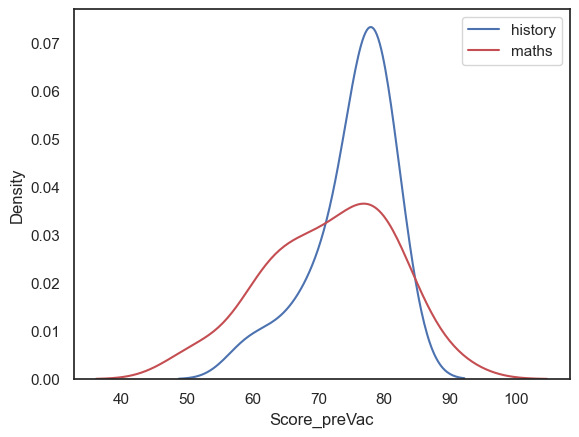

In [9]:
sns.kdeplot(history, color='b')
sns.kdeplot(maths, color='r')
plt.legend(['history','maths'])
plt.show()

### 3. Are welfare scores pre- and post-vac correlated for biology students?

We hypothesise that there is a strong individual difference effect on welfare scores and that scores pre- and post-vac are correlated. Let's say the sample we have availablbe to test this are biology students.

Test the hypothesis using a permutation test.

Let's get two series containing the data we need:

In [10]:
prevac = wb.query('Subject=="Biology"').Score_preVac
postvac = wb.query('Subject=="Biology"').Score_postVac

#### Plot the data

A scatterplot may help us get a sense of whether there is a correlation

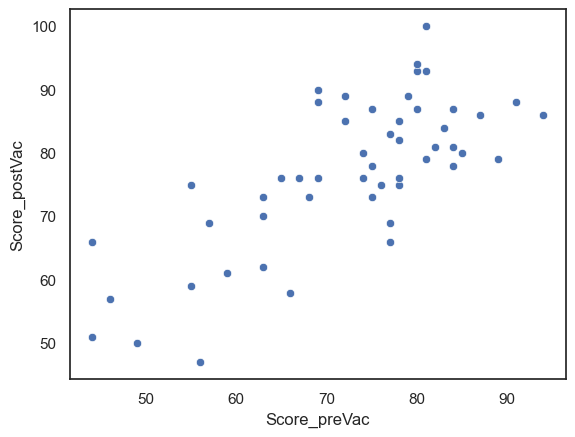

In [11]:
sns.scatterplot(x=prevac, y=postvac)
plt.show()

...looks like there is a correlation. Let's test it.

#### The answers to the things you need to decide!

$\mathcal{H_0}$: The correlation in wellbeing pre- and post- vacation is zero for students in Lonsdale college

$\mathcal{H_a}$: The correlation in wellbeing pre- and post- vacation is greater than zero (students with high wellbeing bbefore the vac also have high wellbeing after the vac)

As this is a correlation, we need `permutation_type = 'pairings'` (shuffle which datapoints are paired with which)


In [12]:
# define a function that gives the correlation for two series x and y
# note that np.corrcoef returns a 2x2 matrix so we need to get just the relevant element
def mycorr(x,y):
    c = np.corrcoef(x,y)
    return c[0,1]

It's a bit ambiguous whether a one- or two-tailed test is needed here.

The question does not state the expected direction of effect, which would suggest a two tailed test.

However, there is really only one reasonable direction in which a correlation could be expected, namely a positive correlation (we expect the students with the highest wellbeing before the vac also have highest wellbeing after the vac, hence we expect a positive correlation coefficient) - the reverse (students with high wellbeing before the vac have low wellbeing after) is nonsensical. So on the basis of common sense you could argue for a one-tailed test (and hence use `alternative='greater'`).

Either of these is an acceptable answer as long as you briefly explain your decision.

We will test at the 5% ($𝛼=0.05$) level

#### Run the test!

Here is some code to run the test:

In [13]:
stats.permutation_test((prevac,postvac), mycorr, alternative='greater', permutation_type='pairings', n_resamples=10000)

PermutationTestResult(statistic=0.7401813753937694, pvalue=9.999000099990002e-05, null_distribution=array([-0.01079785,  0.01048888, -0.12787486, ...,  0.24809854,
       -0.03996344,  0.11540204]))

#### Is it significant?

Reading the test output:
    
`statistic=0.7401813753937694`    

The correlation between pre and post vac wellbeing scores in out 'real' sample was 0.74

`pvalue=9.999000099990002e-05`

The probability of obtaining such a large difference in welfare due to chance if there was really no effect of the subject is 9.99 x $10^{-5}$%, which is 0.0000999 or about one in ten thousand

#### Conclusions

We reject the null hypothesis as $p$ is much smaller than $\alpha$ and conclude there is a correlation between wellbeing scores pre and post vacation

#### How would you write that up in a journal article?

We hypothesised that wellbeing before and after the vacation would be correlated across individuals. We calculated Pearson's $r$ for a group of biology students (n=51) before and after the vacation, and tested its significance using a permutation test. There was a highly significant positive correlation (r=0.74, p<0.0001, one tailed), meaning that students with higher wellbeing before the vacation also had high wellbeing after the vacation.